
Duy Nguyen 414851
Anna Myöhänen 71273

Recommender Systems 2020
Assignment 2



**Instructions**

We have implemented the task in Python, using pandas and Numpy libraries. The code itself is
enough to run, as long as you have internet connection and a Python 3 interpreter. We have
uploaded the data file in github in such a way, that the code reads the data from there.
The code gives information of its running and which part of the required jobs it is processing. 

The
assumptions have been added as prints, so the code should explain what it is doing and print the
results of computation. The inter-results such as the table of current predictions, are not printed.
The code has also been explained in comments.


**Assumptions**

We accepted movies that have more than ten ratings. This was because we wanted to avoid
prediction bias. On the other hand, we did not put a limit on how many common movies the two
users should have for proper similarity computing.


We decided to recommend only such movies that nobody of the group has seen. In real life, it is
not impossible to people to watch the same movie again, especially if you want to show your
favourite movie to the group. But in this task, we put every member of the group in the same
position. In the beginning, we remove all the movies that somebody of the group has rated.


We assume that the group watches the movies we recommend. That means, that after each
iteration, we take the recommended movies out of the set of possible recommendations to come.


The theory uses the term prefer, referring both to the predictions and real ratings. We use only
predictions as a measure of fit.

**In the assignment 1, the task was to implement user-based and item-based approach of
collaborative filtering. We did not have the group, and had two different solutions. To proceed
with our group that was formed after the assignment 1, we took parts of the both solutions.**

In [ ]:
import numpy as np
import pandas as pd

print('Load the data and some pre-processing')
print()
path = 'https://raw.githubusercontent.com/duy7590/Group-Recommender-System/main/ratings.csv'
df = pd.read_csv(path)
df = df.drop(labels=['timestamp'], axis=1)

# This part is the similarity computation using Duy's code
df1 = df.pivot_table(index='movieId', columns='userId', values='rating')
matrix_corr_user = df1.corr(method='pearson').fillna(0) #User similarity matrix

# Predictions computation for individual users
user_means = df1.mean(axis=0) # Means across all users
#You use np.newaxis so that mean_user_rating has same format as ratings
rat_diff = (df1 - user_means[np.newaxis, :]).fillna(0) # 0 instead of missing value

# Many sources use this abs approach, and we used it since it gives reasonable
# predictions.
# Predictions for all users:
pred3 = user_means[np.newaxis, :] + (matrix_corr_user.dot(rat_diff.T) / np.array([np.abs(matrix_corr_user).sum()]).T).T


Load the data and some pre-processing



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


**In the assignment 2, we implemented two methods for selecting recommendations for a group of
three test users. At first, we computed individual predicted scores for each group member, using 
2
the fin_unseen_movies function that removes all the movies that some of the group has rated.
Each group member got a personal predicted rating for every predicted movie. We saved the
result in a pandas dataframe called predictions, and then formulated the group recommendations
using the predictions data.**

In [ ]:
# Choosing the users for demonstration part
user1 = 1
user2 = 2
user3 = 3

print()
print('The users chosen for testing are ' + str(user1) + ', ', end='')
print(str(user2) + ' and ' + str(user3))
print()
print('Assumption made here is, that only such movies that none of ', end='')
print('the test users have rated, are taken into recommendations, ', end='')
print('and furthermore, such movies that have enough ratings.')
print()


The users chosen for testing are 1, 2 and 3

Assumption made here is, that only such movies that none of the test users have rated, are taken into recommendations, and furthermore, such movies that have enough ratings.



In [ ]:
pred3

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.395453,3.871710,2.342304,3.622142,3.744139,3.574012,3.381482,3.654164,3.393757,3.270987,3.843882,4.418018,3.700108,3.480021,3.372309,3.757538,4.286471,3.838718,2.726793,3.685030,3.242533,2.637076,3.629355,3.750428,4.947670,3.341514,3.515818,3.069729,4.168668,4.778822,4.104608,3.768082,3.764194,3.449874,4.120789,2.712218,4.167038,3.276709,4.050485,3.937922,...,2.624248,4.161672,4.353419,4.074409,3.253243,3.109756,3.670932,4.046723,3.891299,3.541935,4.432596,4.063155,3.273128,4.247271,4.342893,4.416056,4.098682,3.348923,4.147666,3.496665,3.291995,3.682250,3.313596,3.947293,4.264499,3.652827,4.046486,3.747644,2.764069,3.060513,4.405313,3.484569,3.609277,3.428848,3.307988,3.693829,3.850826,3.192719,3.289780,3.846024
2,4.336447,3.971724,2.502512,3.565537,3.629628,3.512823,3.245195,3.585542,3.233774,3.273541,3.768286,4.462624,3.620368,3.376901,3.470132,3.756334,4.196904,3.708501,2.595441,3.541218,3.285498,2.606125,3.635263,3.656132,4.759206,3.224383,3.566155,3.015927,4.163779,4.717797,3.921753,3.722255,3.782090,3.410187,4.053509,2.635711,4.099500,3.194847,4.009653,3.759878,...,2.557349,4.126767,4.202762,3.948711,3.144139,2.998858,3.571648,4.032636,3.974011,3.517398,4.378514,4.024848,3.300625,4.108258,4.328376,4.352064,3.968262,3.233469,4.030247,3.342710,3.267409,3.588412,3.258778,3.928712,4.137525,3.492210,3.953069,3.826829,2.616783,2.975696,4.412709,3.384235,3.487064,3.494456,3.200557,3.638761,3.775572,3.103036,3.248221,3.670553
3,4.341434,3.936610,2.400548,3.533795,3.628538,3.511906,3.210913,3.550623,3.228593,3.294340,3.768489,4.383194,3.621223,3.390565,3.433421,3.733253,4.177857,3.709381,2.590890,3.579098,3.269391,2.580624,3.644281,3.637554,4.788080,3.212679,3.549218,3.002216,4.151623,4.710412,3.923575,3.725882,3.769166,3.396918,4.090822,2.620825,4.135414,3.206145,3.983314,3.759431,...,2.592749,4.094309,4.195019,3.988863,3.161340,3.074476,3.554094,3.971955,3.982353,3.516121,4.362834,4.035222,3.308339,4.109936,4.348582,4.365449,3.973378,3.238472,4.030611,3.328795,3.264214,3.574955,3.242845,3.932183,4.141996,3.469700,3.960164,3.808110,2.610324,2.967786,4.401626,3.370911,3.500207,3.473904,3.203231,3.638925,3.806848,3.097996,3.248603,3.666298
4,4.358346,3.945726,2.439076,3.547154,3.631121,3.482326,3.210330,3.560716,3.254608,3.272763,3.774863,4.392838,3.629019,3.392378,3.432697,3.709560,4.198527,3.722673,2.605450,3.588983,3.253037,2.558242,3.644657,3.641350,4.788451,3.239248,3.535534,3.016182,4.129243,4.708406,3.923407,3.748577,3.785518,3.430491,4.087627,2.641819,4.145392,3.215219,3.998294,3.761346,...,2.568220,4.118940,4.208087,3.953182,3.161395,3.121432,3.556667,3.936581,3.962404,3.519829,4.383460,4.027393,3.301710,4.106413,4.326489,4.356564,3.969352,3.250721,4.009968,3.344782,3.281874,3.586200,3.253524,3.937457,4.193915,3.481120,3.974430,3.813529,2.633008,2.971436,4.426145,3.388647,3.501382,3.474541,3.198360,3.654711,3.790389,3.124864,3.252487,3.685995
5,4.346792,3.946823,2.501463,3.545041,3.624909,3.492260,3.177174,3.527641,3.213955,3.312446,3.745246,4.385579,3.601837,3.364508,3.438876,3.721545,4.180194,3.691156,2.567927,3.560838,3.257202,2.554634,3.650529,3.607993,4.707935,3.190578,3.539237,2.995315,4.138624,4.700303,3.884438,3.704896,3.755776,3.413844,4.072392,2.616042,4.124408,3.171372,3.935544,3.718842,...,2.534488,4.085688,4.179364,3.953130,3.127707,3.126443,3.555359,3.887137,3.963700,3.518143,4.357563,4.018006,3.296310,4.084459,4.349235,4.340052,3.939898,3.199568,3.959827,3.293853,3.258113,3.530154,3.225947,3.930112,4.097924,3.453787,3.947177,3.838028,2.589376,2.957618,4.392110,3.346352,3.468249,3.444146,3.182427,3.614017,3.769255,3.088101,3.229342,3.651702

In [ ]:
def find_unseen_movies(user1, user2, user3, data):
    
    data1 = data.loc[data['userId']==user1] # Data where user1 has ratings
    mask1 = ~data['movieId'].isin(data1['movieId']) # Drops the movies of 1
    data_left1 = data[mask1] # What remains after user1
    
    data2 = data.loc[data['userId']==user2] # Data where user2 has ratings
    mask2 = ~data_left1['movieId'].isin(data2['movieId']) # Dropping off
    data_left2 = data_left1[mask2] # What remains after user2 
    
    data3 = data.loc[data['userId']==user3] # Data where user3 has ratings
    mask3 = ~data_left2['movieId'].isin(data3['movieId'])
    data_left3 = data_left2[mask3]  # Here are only unseen movies
    
    # Numpy array of unique values of the rest of the movieIds
    return data_left3['movieId'].unique()

In [ ]:
necessary_ratings = 10 # In order to be qualified for the test, a movie must have at least 10 ratings

movie_list = []
for i in range(len(pred3)):
    if df1.iloc[i].count() > necessary_ratings:
        movie_list.append(df1.iloc[i].name)
    else:
        pass
print('Number of movies that have more than ' + str(necessary_ratings) + ' ratings: '+str(len(movie_list)))
print()

movies_enough_ratings = np.array(movie_list)
# Call of a function that drops off the movies that somebody of the group has seen.
# Data are the movies with enough ratings.
unseen_movies = find_unseen_movies(user1, user2, user3, df.loc[df['movieId'].isin(movies_enough_ratings)])
print('Number of such movies of those, that nobody of the group has not yet seen: ' + str(len(unseen_movies)))
print()

Number of movies that have more than 10 ratings: 2121

Number of such movies of those, that nobody of the group has not yet seen: 1871



Text(27.125, 0.5, 'Number of rating made')

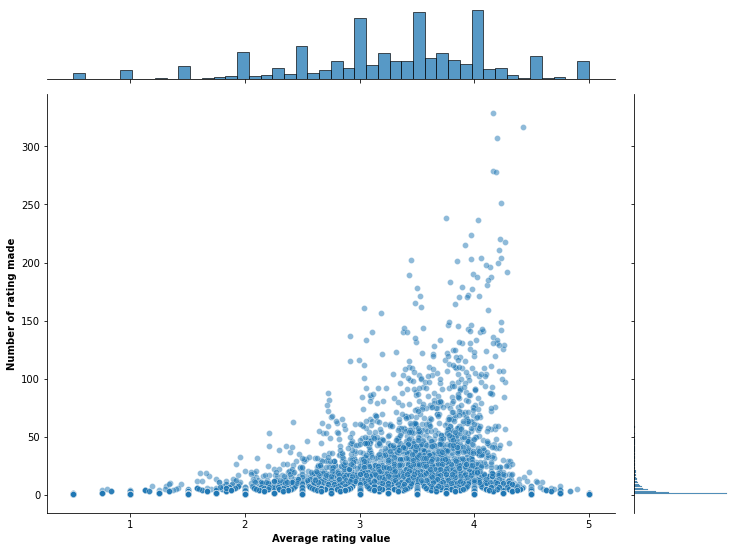

In [ ]:
# Demonstration of the distribution of the collected ratings
import seaborn as sns
average_rating_value=df.pivot_table(index='movieId',aggfunc=np.mean)['rating']
number_of_rating_made=df.pivot_table(index='movieId',aggfunc=np.count_nonzero)['rating']
sns_plot=sns.jointplot(x=average_rating_value, y=number_of_rating_made, alpha=0.5)
sns_plot.fig.set_figwidth(11)
sns_plot.fig.set_figheight(8)
sns_plot.ax_joint.set_xlabel('Average rating value', fontweight='bold')
sns_plot.ax_joint.set_ylabel('Number of rating made', fontweight='bold')

In [ ]:
unseen_movies

array([    21,     32,     45, ..., 111364,   1327,   5128])


**We presented the average and least misery methods of recommending. We computed the
average and least misery (lowest prediction of all test users) for each movie and saved them into
their own columns in the predictions table. To present the result, we sorted the average and least
misery columns from highest to lowest value, and printed the 20 movies with highest values of
both methods.t**

**I the B part, we created our own version of a method that takes into account the disagreements
between the group members. We considered sample standard deviation of the group predictions
as a measure of the disagreements. We chose the difference of the highest and the lowest
prediction, since it is a simpler solution. The sample standard deviation would take into account all
opinions in the group, as the simple difference omits the effect of the third person, whose
prediction can be anything from the lowest value to the highest. We preferred the simple solution.**

**As the group value of each movie, we took the average prediction of the three users and penalized
that by reducing the maximum difference of predictions, multiplied by a factor a, that could be
adjusted if necessary. We tried the factor a value 0.5, that did not exceed the limits of the
reasonable predictions of 0.5 – 5.0. If we had had more time and professionality for this project,
we could have opmitized the a factor. Now it is just theoretical knowledge, that the more weight
you want to put on the disagreements, the higher the value a, as long as the a*maximum
difference does not grow so high that predictions take values lower than 0.5. That depends also on
the group and how different their taste is. To find the general limits of a for this data, we should
find the group with highest dissimilarity and use them for defining a.**

In [ ]:

#Predict table : Function to take the input updated unseen movies array and 
#number of movies to compute the predicted rating of each user for all movies

def predicted_rating(k, unseen_movies):
  # This is the table for storaging the individual predictions of the test users.
  predicts = pd.DataFrame(data=None, index=unseen_movies)
  predicts.index.name = 'movieId'

  predicts = predicts.merge(pred3[user1], how='left', on='movieId')
  predicts = predicts.merge(pred3[user2], how='left', on='movieId')
  predicts = predicts.merge(pred3[user3], how='left', on='movieId')

  predicts.columns=['predict1', 'predict2', 'predict3']

  # Compute the recommendations using our B part design from Assignment 2.

  a = 0.5  # A scalar used for predictions penalizing
  predicts['min_pred'] = predicts[['predict1', 'predict2', 'predict3']].min(axis=1)
  predicts['max_pred'] = predicts[['predict1', 'predict2', 'predict3']].max(axis=1)
  predicts['average'] = predicts.loc[:,
        ['predict1', 'predict2', 'predict3']].mean(axis=1)
  predicts['biggest_diff'] = predicts['max_pred'] - predicts['min_pred']
  predicts['method_ad'] = predicts['average'] - a * predicts['biggest_diff']
  
  return  predicts

print('Predicted rating of movies table:')
predicted_rating(4,unseen_movies)



Predicted rating of movies table:


,predict1,predict2,predict3,min_pred,max_pred,average,biggest_diff,method_ad
movieId,,,,,,,,
21,4.371578,3.933938,2.427409,2.427409,4.371578,3.577641,1.944169,2.605557
32,4.439603,3.890658,2.389650,2.389650,4.439603,3.573304,2.049953,2.548327
45,4.366465,3.942004,2.453625,2.453625,4.366465,3.587364,1.912840,2.630945
52,4.378357,3.974699,2.435748,2.435748,4.378357,3.596268,1.942609,2.624964
58,4.403244,3.935340,2.369441,2.369441,4.403244,3.569341,2.033803,2.552440
...,...,...,...,...,...,...,...,...
85510,4.364114,3.943469,2.435873,2.435873,4.364114,3.581152,1.928242,2.617031
93363,4.362542,3.949457,2.442572,2.442572,4.362542,3.584857,1.919970,2.624872
111364,4.357755,3.964128,2.460061,2.460061,4.357755,3.593982,1.897693,2.645135


**In assignment 3, the task was to design a new method for sequence recommendations, taking
advantage of our previous method and the approach presented in the lectures. The theoretical
idea should be compute the satisfaction of the group after each sequence, and balance the next
sequence according to the satisfaction in the previous one. The user who was least satisfied,
should then get more attention on the next sequence. There we optimize the system according to
both predicted preferrence and lowest satisfaction in the group, aiming to the solution where we
could give quite good recommendations in general for the whole group, and avoid omitting the
possible dissimilar member all the time.**

In [ ]:
#Recommended_movies table : Function produce Recommended_movies table by using 
#the input updated unseen movies array  and number k of movies that will be 
#recommended to users based on the Method B

def recommended_movies(k, unseen_movies):

  result_B = predicted_rating(k, unseen_movies).sort_values(by='method_ad', ascending=False)

  result = result_B.iloc[0:k]

  return result


print('Top 4 rated movies by Method_AD rating:')
recommended_movies(15,unseen_movies)

Top 4 rated movies by Method_AD rating:


,predict1,predict2,predict3,min_pred,max_pred,average,biggest_diff,method_ad
movieId,,,,,,,,
788,4.285403,3.950792,2.679206,2.679206,4.285403,3.638467,1.606198,2.835368
344,4.284537,4.050802,2.603223,2.603223,4.284537,3.646188,1.681314,2.805531
2701,4.289282,3.960975,2.638217,2.638217,4.289282,3.629491,1.651065,2.803959
44,4.345364,4.013792,2.611155,2.611155,4.345364,3.656770,1.734209,2.789666
3623,4.308852,4.036953,2.587348,2.587348,4.308852,3.644384,1.721504,2.783632
784,4.322327,3.988367,2.597320,2.597320,4.322327,3.636005,1.725006,2.773502
1391,4.322989,3.964831,2.599482,2.599482,4.322989,3.629101,1.723507,2.767347
185,4.278811,3.992097,2.567897,2.567897,4.278811,3.612935,1.710914,2.757478
2411,4.339937,3.996937,2.569043,2.569043,4.339937,3.635306,1.770894,2.749859







**Function to compute the satisfaction of each users and the alpha value which will be used later on the dynamic computation of the hybrid rating score**

In [ ]:
# Function to compute 2 values:
#   alpha_j: the alpha value aka difference in satisfaction between the most satisfied user and least satisfied user in the group
#   sats_j: list of user satisfaction 

# Satisfaction computation
def satisfaction(user1,user2,user3, k, unseen_movies):
  test_users = [user1, user2, user3]
  sats_j = [] # Satisfactions of all users per one iteration
  for ui in test_users:
    GroupListSat_ui_Grj = recommended_movies(k, unseen_movies).sum().iloc[ui-1]
    UserListSat_ui_Auij = predicted_rating(k, unseen_movies).iloc[:, ui-1].sort_values(ascending=False)[0:k].sum()
    sat_ui_Grj = GroupListSat_ui_Grj / UserListSat_ui_Auij
    sats_j.append(sat_ui_Grj)
    alpha_j = max(sats_j) - min(sats_j)
  return alpha_j, sats_j


print('Test the function')
alpha_value = satisfaction(user1,user2,user3, 20, unseen_movies)[0]
satisfaction_value = satisfaction(user1,user2,user3, 20, unseen_movies)[1]
print('alpha_value: ' + str(alpha_value) )
print('satisfaction_value of 3 users: ' + str(satisfaction_value) )


Test the function
alpha_value: 0.02864328731442678
satisfaction_value of 3 users: [0.9700440355341234, 0.9930377057002167, 0.9986873228485502]


**Below is the itertion experiment**

**Here is our modified algorithm, based on the Algorithm 1, presented in the research paper Stratigi
et al. (2020). This pseudocode presents the computation of one iteration, denoted by j. In the
assignment, the length of a sequence is k=4, and j takes the values 1, 2, …, 5.**

A <- the individual recommendation lists for all test users using our method B, from pool unseen_movies

Gl <- null

For ui in G do
> Get the indidual recommendations and storage them into a pool Gl
end


If j = 1
> alpha_j = 0 (alpha_j is a optimizing factor that depends on j
else
> alpha_j = highest satisfaction – lowest satisfaction among users, in the previous j

End

For movie dz in set Gl:

> compute score(G, dz, j) according to the formula in the paper
> Grj <- add scores for items dz in Gl, the set of all recommended items for any user

end


Sort Grj

Report top k items for this j


**In our case, remove the recommended movies from unseen_movies
In our method B, we already take into account the disagreements between test users. In this case,
it is not very easy to see how these mixed methods work in the combined result. It may be that
method B gives already low disagreement recommendations, and the role of alpha_j stays not
very important. If we had more time, we could test this by printing the values of alpha_j during the
iterations, and compare that with the situation of the same test group and same pool of unseen
movies, but replacing the method B by the average used in the paper of Stratigi et al (2020).
Source:
Stratigi etc add the real source**

In [ ]:
#Compute the recommended movies for each iteration to make an Optimal satisfaction for each users

k=4 
iteration_num = 5

#The initial starting unseen movies pool, after each iteration, this pool will be updated
unseen_movies = find_unseen_movies(user1, user2, user3, df.loc[df['movieId'].isin(movies_enough_ratings)])
#The variable previousS_alpha will be used to store the value of alpha after eache iteration
previousS_alpha = satisfaction(user1,user2,user3,k,unseen_movies)[0]


for j in range(iteration_num):
  Gl = [] # Initialize the set Gl where we store the preference list of all users
  G = [user1,user2,user3]
  
  # Make a table of prediction from all users for all movies based on the unseen movies
  predict_table = predicted_rating(k,unseen_movies)
  
  #Populate the set Gl: All recommended items for any user will be added to the pool Gl
  for ui in G:
    Gl.extend(list(predict_table.iloc[:,0].sort_values(ascending=False).index.values))  
  Gl = list(set(Gl))  #Only keep the unique movies
  
  #Set the value for alpha 
  if j == 0:
    alpha_j = 0 
  else:
    alpha_j = previousS_alpha

  #Compute the score and select the top k movies with best score
  Grj = {}
  for movie_dz in Gl:
    score = (1-alpha_j)*predict_table.loc[movie_dz]['average'] + alpha_j * predict_table.loc[movie_dz]['biggest_diff']
    Grj[movie_dz] = score
  Grj_table  = pd.DataFrame(list(Grj.items()),columns = ['MovieID','rating']).sort_values(by=['rating'],ascending = False ) 
  Grj_table.set_index("MovieID", inplace = True)
  
  #Print the results:
  print('Iteration '+str(j+1))
  print('-----------------------------------')
  print('number of unseen movies:'+str(unseen_movies.shape[0]))
  print('Group satisfaction:'+str(sum(satisfaction(1,2,3,k,unseen_movies)[1]) / len(G)))
  print('User satisfaction:')
  print(satisfaction(1,2,3,k,unseen_movies)[1])

  print('Alpha value:'+str(alpha_j))
  print('Recommended movies:')
  print(Grj_table.head(k))
  print('-----------------------------------\n')

  #Updating the previousS_alpha value to be used for the next iteration
  previousS_alpha = satisfaction(1,2,3,k,unseen_movies)[0]
  #Updating the unseen_movies pool by subtracting the top k movies with best score from the un_seen movies to prepare for next iteration
  unseen_movies = np.delete(unseen_movies, np.argwhere(np.isin(unseen_movies, Grj_table.index.array[0:k])))





Iteration 1
-----------------------------------
number of unseen movies:1871
Group satisfaction:0.9825952219917345
User satisfaction:
[0.9585770113906756, 0.9892086545845277, 1.0]
Alpha value:0
Recommended movies:
           rating
MovieID          
44       3.656770
344      3.646188
3623     3.644384
380      3.639203
-----------------------------------

Iteration 2
-----------------------------------
number of unseen movies:1867
Group satisfaction:0.9813938924223211
User satisfaction:
[0.959435884582112, 0.9847457926848514, 1.0]
Alpha value:0.04142298860932436
Recommended movies:
           rating
MovieID          
1274     3.564970
1129     3.560013
2411     3.558076
784      3.556845
-----------------------------------

Iteration 3
-----------------------------------
number of unseen movies:1863
Group satisfaction:0.980375612347595
User satisfaction:
[0.9570113501324019, 0.9849773080557149, 0.9991381788546684]
Alpha value:0.04056411541788796
Recommended movies:
           rating
M

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Duy Nguyen 414851
Anna Myöhänen 71273

Recommender Systems 2020
Assignment 3

"""

import numpy as np
import pandas as pd

print('Load the data and some pre-processing')
print()
#path = '/Users/myohanea/Recommender_data/ratings.csv'
path = 'https://raw.githubusercontent.com/duy7590/Group-Recommender-System/main/ratings.csv'
df = pd.read_csv(path)
df = df.drop(labels=['timestamp'], axis=1)

# This part is the similarity computation using Duy's code
df1 = df.pivot_table(index='movieId', columns='userId', values='rating')
matrix_corr_user = df1.corr(method='pearson').fillna(0) #User similarity matrix

# Predictions computation for individual users
user_means = df1.mean(axis=0) # Means across all users
#You use np.newaxis so that mean_user_rating has same format as ratings
rat_diff = (df1 - user_means[np.newaxis, :]).fillna(0) # 0 instead of missing value

# Many sources use this abs approach, and we used it since it gives reasonable
# predictions.
# Predictions for all users:
pred3 = user_means[np.newaxis, :] + (matrix_corr_user.dot(rat_diff.T) / np.array([np.abs(matrix_corr_user).sum()]).T).T


# Choosing the users for demonstration part
user1 = 1
user2 = 2
user3 = 3

print()
print('The users chosen for testing are ' + str(user1) + ', ', end='')
print(str(user2) + ' and ' + str(user3))
print()
print('Assumption made here is, that only such movies that none of ', end='')
print('the test users have rated, are taken into recommendations, ', end='')
print('and furthermore, such movies that have enough ratings.')
print()


def find_unseen_movies(user1, user2, user3, data):
    
    data1 = data.loc[data['userId']==user1] # Data where user1 has ratings
    mask1 = ~data['movieId'].isin(data1['movieId']) # Drops the movies of 1
    data_left1 = data[mask1] # What remains after user1
    
    data2 = data.loc[data['userId']==user2] # Data where user2 has ratings
    mask2 = ~data_left1['movieId'].isin(data2['movieId']) # Dropping off
    data_left2 = data_left1[mask2] # What remains after user2 
    
    data3 = data.loc[data['userId']==user3] # Data where user3 has ratings
    mask3 = ~data_left2['movieId'].isin(data3['movieId'])
    data_left3 = data_left2[mask3]  # Here are only unseen movies
    
    # Numpy array of unique values of the rest of the movieIds
    return data_left3['movieId'].unique()


necessary_ratings = 10
movie_list = []
for i in range(len(pred3)):
    if df1.iloc[i].count() > necessary_ratings:
        movie_list.append(df1.iloc[i].name)
    else:
        pass
print('Number of movies that have more than ' + str(necessary_ratings) + ' ratings: '+str(len(movie_list)))
print()

movies_enough_ratings = np.array(movie_list)
# Call of a function that drops off the movies that somebody of the group has seen.
# Data are the movies with enough ratings.
unseen_movies = find_unseen_movies(user1, user2, user3, df.loc[df['movieId'].isin(movies_enough_ratings)])
print('Number of such movies of those, that nobody of the group has not yet seen: ' + str(len(unseen_movies)))
print()


#Predict table : Function to take the input updated unseen movies array and 
#number of movies to compute the predicted rating of each user for all movies

def predicted_rating(k, unseen_movies):
  # This is the table for storaging the individual predictions of the test users.
  predicts = pd.DataFrame(data=None, index=unseen_movies)
  predicts.index.name = 'movieId'

  predicts = predicts.merge(pred3[user1], how='left', on='movieId')
  predicts = predicts.merge(pred3[user2], how='left', on='movieId')
  predicts = predicts.merge(pred3[user3], how='left', on='movieId')

  predicts.columns=['predict1', 'predict2', 'predict3']

  # Compute the recommendations using our B part design from Assignment 2.

  a = 0.5  # A scalar used for predictions penalizing
  predicts['min_pred'] = predicts[['predict1', 'predict2', 'predict3']].min(axis=1)
  predicts['max_pred'] = predicts[['predict1', 'predict2', 'predict3']].max(axis=1)
  predicts['average'] = predicts.loc[:,
        ['predict1', 'predict2', 'predict3']].mean(axis=1)
  predicts['biggest_diff'] = predicts['max_pred'] - predicts['min_pred']
  predicts['method_ad'] = predicts['average'] - a * predicts['biggest_diff']
  
  return  predicts

#print('Predicted rating of movies table:')
#predicted_rating(4,unseen_movies)


#Recommended_movies table : Function produce Recommended_movies table by using 
#the input updated unseen movies array  and number k of movies that will be 
#recommended to users based on the Method B

def recommended_movies(k, unseen_movies):

  result_B = predicted_rating(k, unseen_movies).sort_values(by='method_ad', ascending=False)
  result = result_B.iloc[0:k]

  return result


#print('Top rated movies by Method B rating:')
#recommended_movies(4,unseen_movies)


# Function to compute 2 values:
#   alpha_j: the alpha value aka difference in satisfaction between the most satisfied user and least satisfied user in the group
#   sats_j: list of user satisfaction 

# Satisfaction and alpha computation
def satisfaction(user1,user2,user3, k, unseen_movies):
  test_users = [user1, user2, user3]
  sats_j = [] # Satisfactions of all users per one iteration
  for ui in test_users:
    GroupListSat_ui_Grj = recommended_movies(k, unseen_movies).sum().iloc[ui-1]
    UserListSat_ui_Auij = predicted_rating(k, unseen_movies).iloc[:, ui-1].sort_values(ascending=False)[0:k].sum()
    sat_ui_Grj = GroupListSat_ui_Grj / UserListSat_ui_Auij
    sats_j.append(sat_ui_Grj)
    alpha_j = max(sats_j) - min(sats_j)
  return alpha_j, sats_j


#print('Test the function')
#alpha_value = satisfaction(user1,user2,user3, 20, unseen_movies)[0]
#satisfaction_value = satisfaction(user1,user2,user3, 20, unseen_movies)[1]
#print('alpha_value: ' + str(alpha_value) )
#print('satisfaction_value of 3 users: ' + str(satisfaction_value) )




#Compute the recommended movies for each iteration to make an Optimal satisfaction for each users

k=4 
iteration_num = [1,2,3,4,5]

#The initial starting unseen movies pool, after each iteration, this pool will be updated
#unseen_movies = find_unseen_movies(user1, user2, user3, df.loc[df['movieId'].isin(movies_enough_ratings)])
#The variable previous_alpha will be used to store the value of alpha after eache iteration
#previous_alpha = satisfaction(user1,user2,user3,k,unseen_movies)[0]
previous_alpha = 0.0

for j in iteration_num:
  Gl = [] # Initialize the set Gl where we store the preference list of all users
  #G = [user1,user2,user3]
  G = [1,2,3]  # Order numbers of test users, not their values
  
  # Make a table of prediction from all users for all movies based on the unseen movies
  predict_table = predicted_rating(k,unseen_movies)
  #predict_table = recommended_movies(k, unseen_movies)
  
  # Here we should find the top k recs for each user
  # And use them for the next step.
  
  #Populate the set Gl: All recommended items for any user will be added to the pool Gl
  for ui in G:
#    Gl.extend(list(predict_table.iloc[:,0].sort_values(
#            ascending=False).index.values))  
    Gl.extend(list(predict_table.iloc[:,ui-1].sort_values(
            ascending=False)[0:k].index.values))  
  Gl = list(set(Gl))  #Only keep the unique movies
  
  #Set the value for alpha 
  if j == 1:
    alpha_j = 0 
  else:
    alpha_j = previous_alpha

  #Compute the score and select the top k movies with best score
  Grj = {}
  for movie_dz in Gl:
    score = (1-alpha_j)*predict_table.loc[movie_dz]['average'] + alpha_j * predict_table.loc[movie_dz]['biggest_diff']
    #score = (1-alpha_j)*predict_table.loc[movie_dz]['method_ad'] + alpha_j * predict_table.loc[movie_dz]['min_pred']
    Grj[movie_dz] = score
  #Grj_table  = pd.DataFrame(list(Grj.items()),columns = ['MovieID','score']).sort_values(by=['score'],ascending = False ) 
  Grj_table = pd.DataFrame(Grj.items(), columns = ['MovieID','score'])
  Grj_table = Grj_table.sort_values(by=['score'],ascending = False)
  Grj_table.set_index("MovieID", inplace = True)
  
  #Print the results:
  print('Iteration '+str(j))
  print('-----------------------------------')
  print('number of unseen movies:'+str(unseen_movies.shape[0]))
  print('Group satisfaction:'+str(sum(satisfaction(1,2,3,k,unseen_movies)[1]) / len(G)))
  print('User satisfaction:')
  print(satisfaction(1,2,3,k,unseen_movies)[1])

  print('Alpha value:'+str(alpha_j))
  print('Recommended movies:')
  print(Grj_table.head(k))
  print('-----------------------------------\n')

  #Updating the previous_alpha value to be used for the next iteration
  previous_alpha = satisfaction(1,2,3,k,unseen_movies)[0]
  #Updating the unseen_movies pool by subtracting the top k movies with best score from the un_seen movies to prepare for next iteration
  unseen_movies = np.delete(unseen_movies, np.argwhere(np.isin(unseen_movies, Grj_table.index.array[0:k])))







Load the data and some pre-processing



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



The users chosen for testing are 1, 2 and 3

Assumption made here is, that only such movies that none of the test users have rated, are taken into recommendations, and furthermore, such movies that have enough ratings.

Number of movies that have more than 10 ratings: 2121

Number of such movies of those, that nobody of the group has not yet seen: 1871

Iteration 1
-----------------------------------
number of unseen movies:1871
Group satisfaction:0.9825952219917345
User satisfaction:
[0.9585770113906756, 0.9892086545845277, 1.0]
Alpha value:0
Recommended movies:
            score
MovieID          
44       3.656770
344      3.646188
3623     3.644384
788      3.638467
-----------------------------------

Iteration 2
-----------------------------------
number of unseen movies:1867
Group satisfaction:0.9818365331603002
User satisfaction:
[0.9590685776720093, 0.9873096207759896, 0.9991314010329014]
Alpha value:0.04142298860932436
Recommended movies:
            score
MovieID          
7